## Simulate a Non-Stationary AR Process Over Time

In [8]:
import numpy as np
import numpy.random as nprnd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15,10.27)})
from pmdarima.arima import auto_arima
from random import seed
from random import random
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from pandas import datetime

## Generate AR(1) with time trend

In [29]:
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 100):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)


https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

In [30]:
date_array= pd.DataFrame(pd.date_range(start='1/1/2018', end='4/10/2018'), columns=['Date'])
rwt_df=pd.DataFrame(random_walk, columns=['random_walk_trend'])
rwt_df=pd.concat([date_array, rwt_df], axis=1)
        

(array([736692., 736706., 736720., 736734., 736748., 736762., 736776.,
        736790.]), <a list of 8 Text xticklabel objects>)

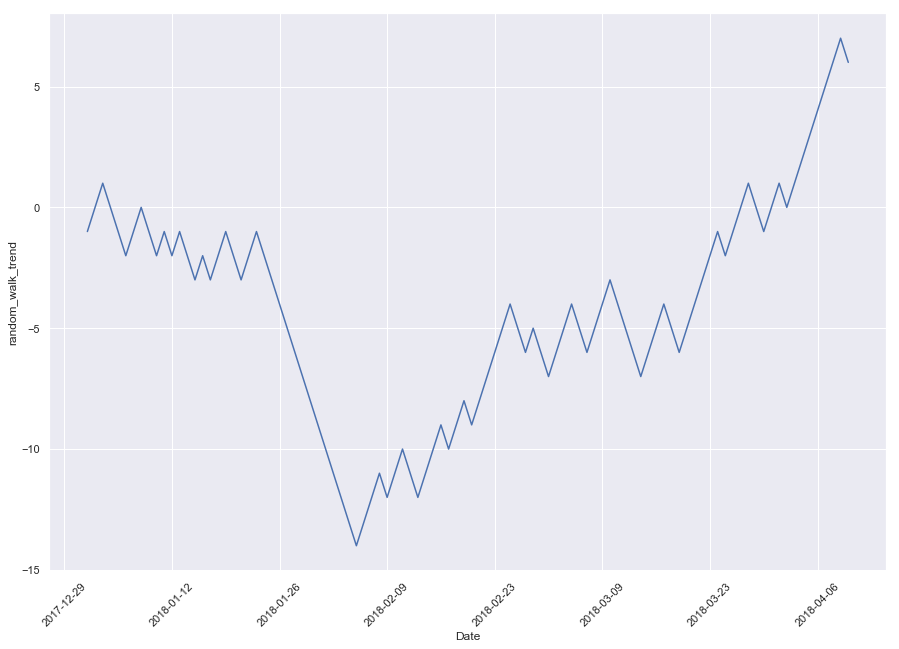

In [31]:
#Plot the WN process
w=sns.lineplot(x="Date", y='random_walk_trend',data=rwt_df)
plt.xticks(rotation=45)

#### Helper function for ADF tests

In [32]:
class StationarityTests:
    def __init__(self, significance=.01):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):

            #Dickey-Fuller test:
            adfTest = adfuller(timeseries, autolag='AIC')

            self.pValue = adfTest[1]

            if (self.pValue<self.SignificanceLevel):
                self.isStationary = True
            else:
                self.isStationary = False

            if printResults:
                dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

                #Add Critical Values
                for key,value in adfTest[4].items():
                    dfResults['Critical Value (%s)'%key] = value

                print('Augmented Dickey-Fuller Test Results:')
                print(dfResults)

#### http://www.insightsbot.com/blog/1MH61d/augmented-dickey-fuller-test-in-python

### Is this TS stationary? It shouldn't be

In [33]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(random_walk, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -0.425513
P-Value                  0.905751
# Lags Used              3.000000
# Observations Used     96.000000
Critical Value (1%)     -3.500379
Critical Value (5%)     -2.892152
Critical Value (10%)    -2.583100
dtype: float64
Is the time series stationary? False


### Attempt first differencing 

In [34]:
diff =rwt_df['random_walk_trend'].diff()


In [93]:
merged_diff= pd.merge(diff_df, date_array,  left_index=True, right_index=True)

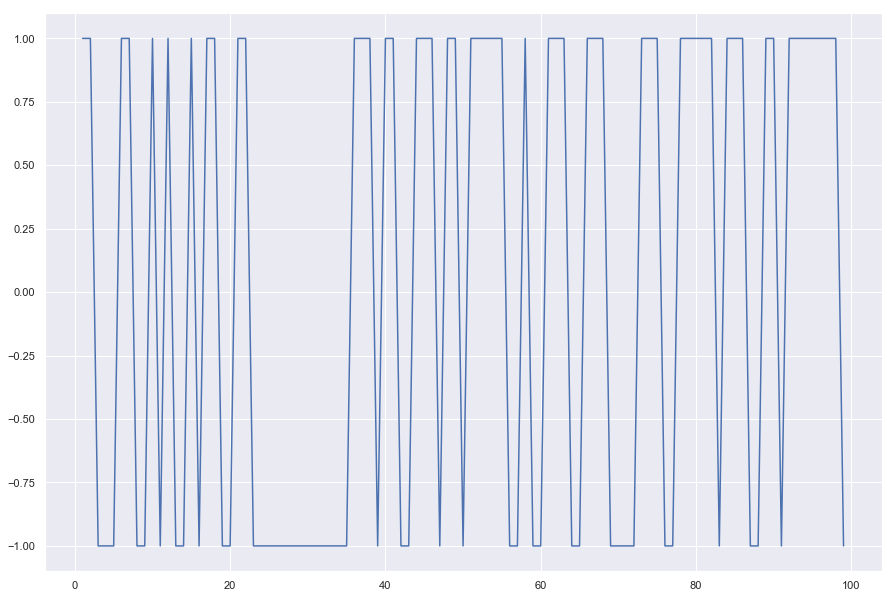

In [35]:
plt.plot(diff)
plt.show()


### ADF test again

In [20]:
sTest.ADF_Stationarity_Test(diff, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -31.084824
P-Value                   0.000000
# Lags Used               0.000000
# Observations Used     998.000000
Critical Value (1%)      -3.436919
Critical Value (5%)      -2.864440
Critical Value (10%)     -2.568314
dtype: float64
Is the time series stationary? True


### Differencing worked!

# Looking at an explosive time series |$\beta_1{(y_t-1)}$| > 1

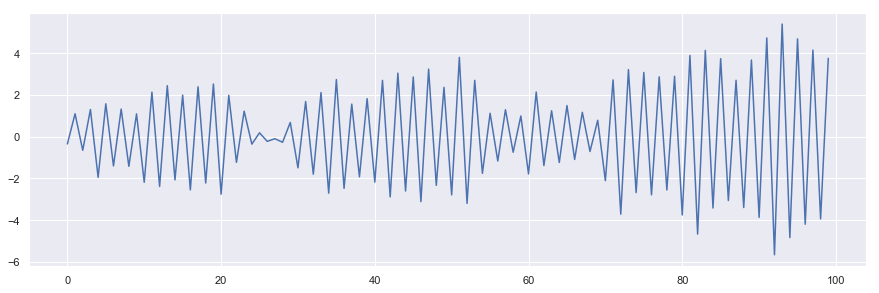

In [6]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess


plt.subplot(2,1,1)
ar1 = np.array([2, 2])

AR_object1 = ArmaProcess(ar1)
simulated_data_1 = AR_object1.generate_sample(nsample=100)
plt.plot(simulated_data_1)
plt.show()
